# Реализация дерево решений для задач сельского хозяйства.

Рассматривается задача оттока фермеров 

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('telecom_churn_work.csv')

In [3]:
data.head(20)

,region,id fermer,kod region,use udobr,have technik,kolvo fermer,plosh yach,call yach,charge yach,plosh kart,call kart,charge kart,plosh seno,call seno,charge seno,plosh pshe,call pshe,charge pshe,customer calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [7]:
data.drop(['region', 'use udobr'], axis=1, inplace=True)

In [8]:
data['have technik'] = data['have technik'].map({'Yes': 1,
                                                             'No': 0})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
id fermer         3333 non-null int64
kod region        3333 non-null int64
have technik      3333 non-null int64
kolvo fermer      3333 non-null int64
plosh yach        3333 non-null float64
call yach         3333 non-null int64
charge yach       3333 non-null float64
plosh kart        3333 non-null float64
call kart         3333 non-null int64
charge kart       3333 non-null float64
plosh seno        3333 non-null float64
call seno         3333 non-null int64
charge seno       3333 non-null float64
plosh pshe        3333 non-null float64
call pshe         3333 non-null int64
charge pshe       3333 non-null float64
customer calls    3333 non-null int64
churn             3333 non-null bool
dtypes: bool(1), float64(8), int64(9)
memory usage: 446.0 KB


In [10]:
y = data['churn'].astype('int')

In [11]:
X = data.drop('churn', axis=1)

In [12]:
X.head()

,id fermer,kod region,have technik,kolvo fermer,plosh yach,call yach,charge yach,plosh kart,call kart,charge kart,plosh seno,call seno,charge seno,plosh pshe,call pshe,charge pshe,customer calls
0,128,415,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [13]:
X.shape, y.shape

((3333, 17), (3333,))

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=17)

In [16]:
X_train.shape, X_valid.shape

((2333, 17), (1000, 17))

In [17]:
first_tree = DecisionTreeClassifier(random_state=17)

In [18]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.8645486210033912

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
first_knn = KNeighborsClassifier()

In [21]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.8671274043984523

## Настраиваем max_depth для дерева

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features':[.5, .7, 1]}

In [24]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [25]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 2.65 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1

In [26]:
tree_grid.best_score_, tree_grid.best_params_

(0.9155593656236605, {'max_depth': 6, 'max_features': 0.7})

In [27]:
knn_params = {'n_neighbors': range(5, 30, 5) }

In [28]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

In [29]:
%%time
knn_grid.fit(X_train, y_train);

Wall time: 885 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(5, 30, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
knn_grid.best_score_, knn_grid.best_params_

(0.8701243034719246, {'n_neighbors': 10})

In [31]:
tree_valid_pred = tree_grid.predict(X_valid)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_valid, tree_valid_pred)

0.918

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_valid, tree_valid_pred)

array([[856,  11],
       [ 71,  62]], dtype=int64)

In [36]:
np.bincount(y_valid)

array([867, 133], dtype=int64)

In [37]:
from sklearn.tree import export_graphviz

In [50]:
second_tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.881

Сначала изучим дерево глубины 2 

In [51]:
export_graphviz(second_tree, out_file='telecom_tree_work02.dot',
               feature_names=X.columns, filled=True,)

In [52]:
!ls -l *.png

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [53]:
!dot -Tpng telecom_tree_work02.dot -o telecom_tree_work02.png

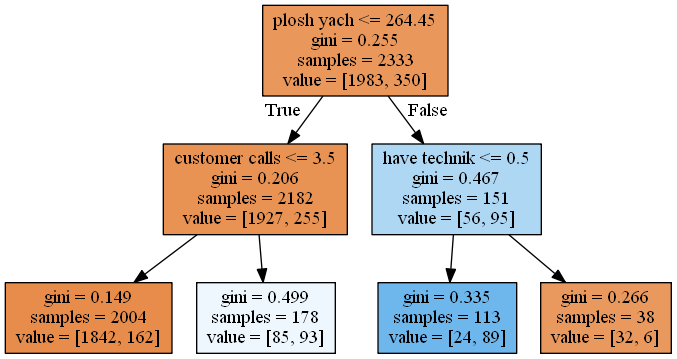

Для глубины 3 имеем следующий модель дерево решений

In [42]:
second_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.903

In [43]:
export_graphviz(second_tree, out_file='telecom_tree_work01.dot',
               feature_names=X.columns, filled=True,)

In [44]:
!ls -l *.png

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [45]:
!dot -Tpng telecom_tree_work01.dot -o telecom_tree_work01.png

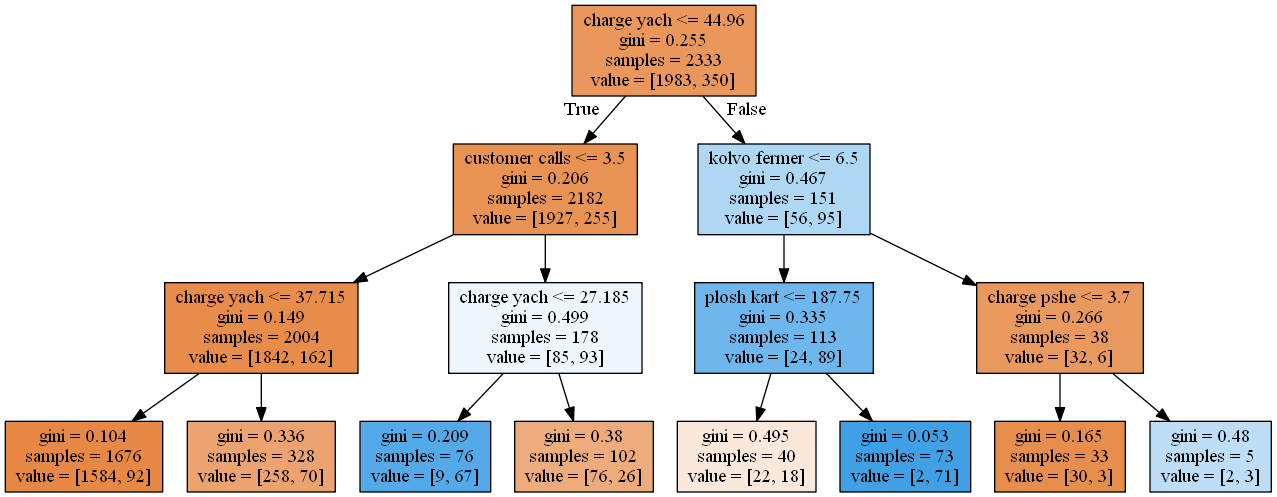

In [46]:
second_tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.907

In [47]:
export_graphviz(second_tree, out_file='telecom_tree_work04.dot',
               feature_names=X.columns, filled=True,)

In [48]:
!ls -l *.png

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [49]:
!dot -Tpng telecom_tree_work04.dot -o telecom_tree_work04.png

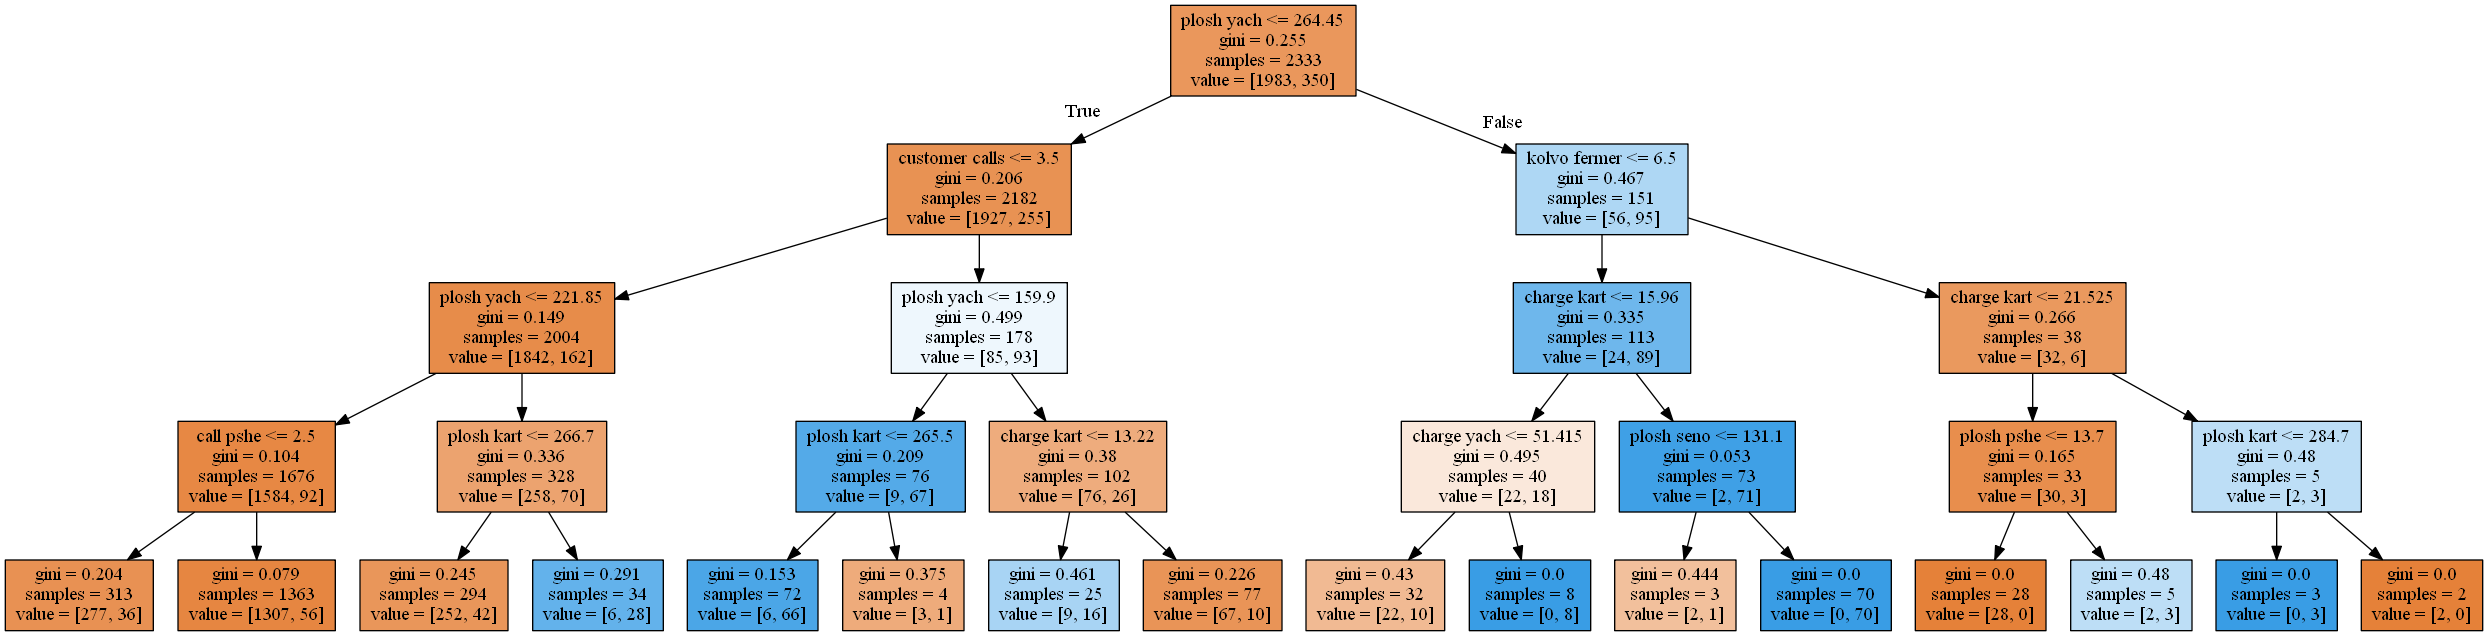

Вот результат дерево решений для глубины дерево max_depth=5

In [54]:
second_tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.914

In [55]:
export_graphviz(second_tree, out_file='telecom_tree05.dot',
               feature_names=X.columns, filled=True,)

In [56]:
!ls -l *.png

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [57]:
!dot -Tpng telecom_tree05.dot -o telecom_tree05.png

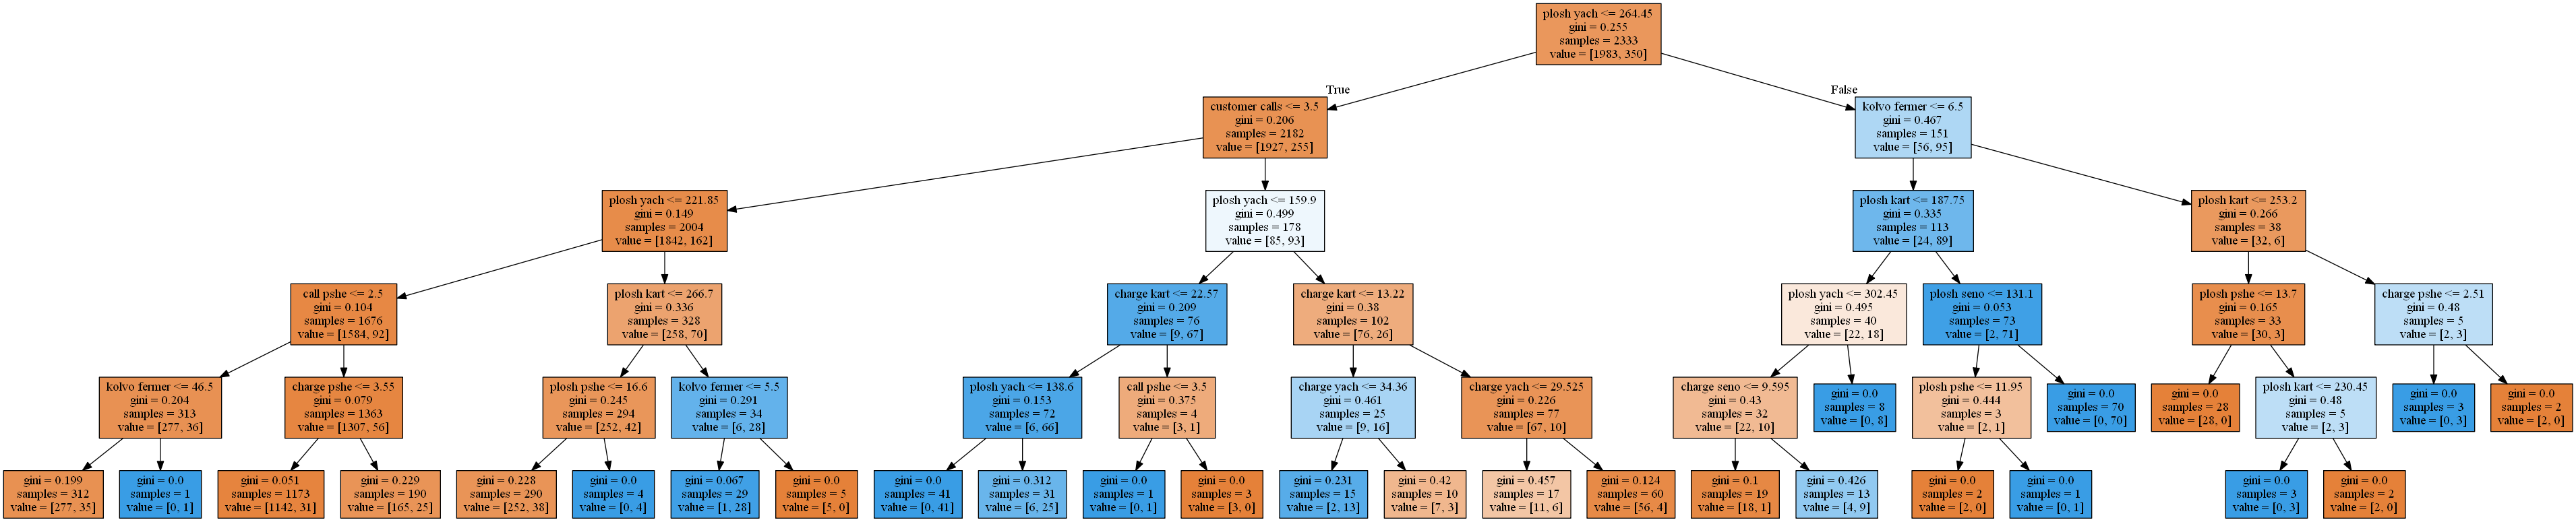